In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

# import warnings

# warnings.filterwarnings("ignore")

In [2]:
# GET DATASETS

df_features = pd.read_csv('csv/Features.csv')
df_streams = pd.read_csv('csv/Streams.csv')

pd.set_option('display.max_rows', None)

In [3]:
# CONCAT DATASETS

df_final=pd.concat([df_features,df_streams],axis=1,join='inner')

# DROP USELESS COLUMNS


df_final=df_final.drop(columns=["Release Date","name","id","Artist"]).set_index("Song")
df_final

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Streams (Billions)
Song,,,,,,,,,,,,,
Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.3340,171.005,0.514,3.449
Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,0.825,3.398
Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.5130,98.027,0.824,2.770
Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.751000,0.000000,0.1050,0.4460,109.891,0.501,2.680
Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.124000,0.000070,0.1310,0.1290,159.801,0.585,2.620
Sunflower,2.63,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,0.760,2.575
One Dance,2.90,0.625,1,-5.609,1,0.0536,0.007760,0.001800,0.3290,0.3700,103.967,0.792,2.556
Closer,4.08,0.524,8,-5.599,1,0.0338,0.414000,0.000000,0.1110,0.6610,95.010,0.748,2.481
Stay,4.01,0.310,9,-10.164,0,0.0283,0.945000,0.000061,0.1170,0.1250,111.893,0.621,2.432


In [4]:
df_final.describe()

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Streams (Billions)
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.635300,0.625500,5.340000,-6.17631,0.650000,0.096448,0.260955,0.007848,0.165682,0.502032,121.253900,0.649630,1.896000
std,0.807997,0.160045,3.627114,2.00858,0.479372,0.088872,0.272764,0.048977,0.122867,0.224953,29.544364,0.144618,0.371272
min,1.520000,0.185000,0.000000,-12.20500,0.000000,0.028100,0.000025,0.000000,0.034400,0.061200,74.897000,0.340000,1.521000
25%,3.122500,0.523750,2.000000,-7.10375,0.000000,0.041200,0.026150,0.000000,0.094300,0.340750,98.022000,0.548000,1.647000
50%,3.505000,0.640000,6.000000,-5.97150,1.000000,0.059400,0.162500,0.000000,0.114000,0.492000,116.864000,0.671500,1.770500
75%,4.030000,0.741000,8.250000,-4.94075,1.000000,0.106000,0.431500,0.000086,0.217000,0.663000,142.439500,0.759250,2.046000
max,7.050000,0.912000,11.000000,-2.81000,1.000000,0.438000,0.945000,0.459000,0.790000,0.969000,186.003000,0.921000,3.449000


<Axes: >

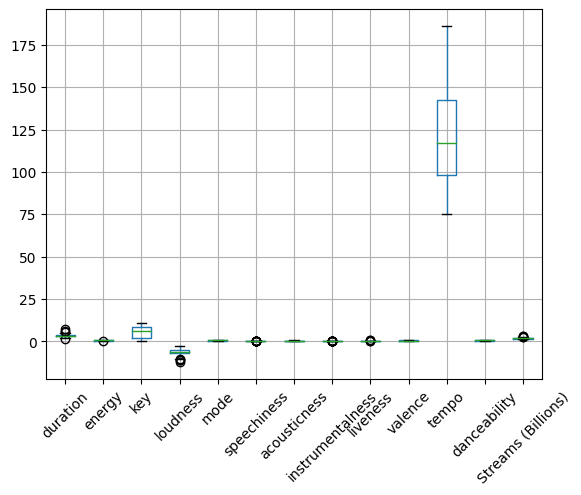

In [5]:
df_final.boxplot(rot=45)

In [6]:
# # Matrice de similarité
# W = np.exp(-1 * df_final ** 2 / 2 ** 2)

# Calcul de la matrice de similarité
similarities = euclidean_distances(df_final)

# Affichage de la matrice de similarité
similarities

array([[ 0.        , 75.09255485, 73.16503271, ..., 75.66787651,
         7.3840498 , 58.69473426],
       [75.09255485,  0.        ,  6.34889665, ...,  2.90223264,
        82.00168323, 17.68328043],
       [73.16503271,  6.34889665,  0.        , ...,  7.15168266,
        80.03668487, 15.15331657],
       ...,
       [75.66787651,  2.90223264,  7.15168266, ...,  0.        ,
        82.57046814, 18.45800828],
       [ 7.3840498 , 82.00168323, 80.03668487, ..., 82.57046814,
         0.        , 65.48167742],
       [58.69473426, 17.68328043, 15.15331657, ..., 18.45800828,
        65.48167742,  0.        ]])

In [7]:
# Spectral Clustering
scores = []
for n_clusters in range(2, 10):
    model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    labels = model.fit_predict(similarities)
    score = silhouette_score(similarities, labels)
    scores.append(score)
    print(f'*** For n_clusters={n_clusters}, The Silhouette Coefficient is {score} ***\n')


# # Graphique
# plt.figure()
# plt.title("Silhouette")
# plt.xlabel("# of clusters")
# plt.plot(range(2, 10), scores)
# plt.title("Optimal nb of clusters")


c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


*** For n_clusters=2, The Silhouette Coefficient is 0.46712508549853277 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.542868600892269 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.4938120904028311 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.5779803053538913 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.559925444143122 ***



c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.wa

*** For n_clusters=7, The Silhouette Coefficient is 0.5361971267796359 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.5311637025566142 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.48951614216312267 ***



c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


In [8]:
# # Graphique
# plt.figure()
# plt.title("Silhouette")
# plt.xlabel("# of clusters")
# plt.plot(range(2, 10, 1), scores)
# plt.title("Optimal nb of clusters")

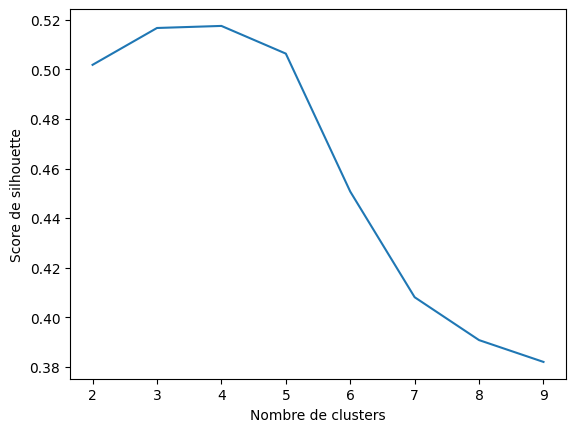

In [22]:
# Calculer le score de silhouette pour différents nombres de clusters
silhouette_scores = []
for k in range(2, 10):
    model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
    cluster_labels = model.fit_predict(df_final)
    silhouette_scores.append(silhouette_score(df_final, cluster_labels))

# Tracer la courbe du score de silhouette
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

In [10]:
# Initialisation du modèle de clustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')

# Entraînement du modèle de clustering
model.fit(df_final)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [11]:
# # Affichage des clusters
# plt.scatter(df_final[:, 2], df_final[:, 1], c=model.labels_)
# plt.title('Spectral Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

clusters = model.fit_predict(df_final)
df_final['cluster'] = clusters
df_final

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Streams (Billions),cluster
Song,,,,,,,,,,,,,,
Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.3340,171.005,0.514,3.449,3
Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,0.825,3.398,1
Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.5130,98.027,0.824,2.770,1
Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.751000,0.000000,0.1050,0.4460,109.891,0.501,2.680,0
Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.124000,0.000070,0.1310,0.1290,159.801,0.585,2.620,2
Sunflower,2.63,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,0.760,2.575,1
One Dance,2.90,0.625,1,-5.609,1,0.0536,0.007760,0.001800,0.3290,0.3700,103.967,0.792,2.556,1
Closer,4.08,0.524,8,-5.599,1,0.0338,0.414000,0.000000,0.1110,0.6610,95.010,0.748,2.481,1
Stay,4.01,0.310,9,-10.164,0,0.0283,0.945000,0.000061,0.1170,0.1250,111.893,0.621,2.432,0


In [12]:
# # Calcul de la matrice de similarité
# similarities = euclidean_distances(clusters)

# # Affichage de la matrice de similarité
# similarities

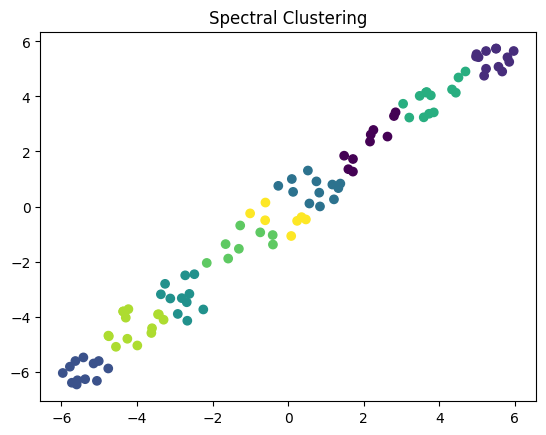

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction de la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_final)

# Affichage des clusters
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title("Spectral Clustering")
plt.show()

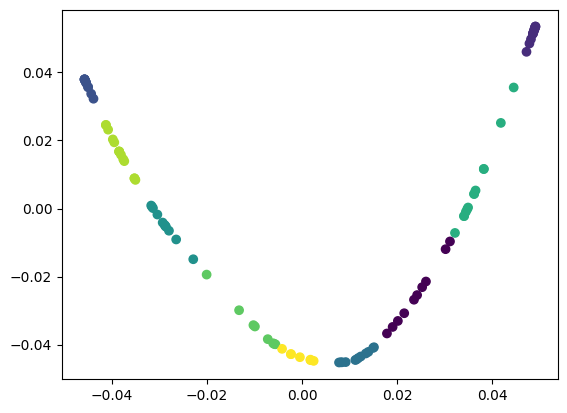

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding

# création du modèle de spectral embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
X_transformed = embedding.fit_transform(similarities)

# affichage des données projetées dans l'espace 2D
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='viridis')
plt.show()

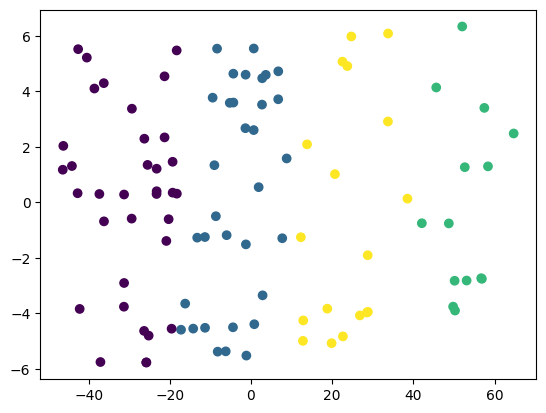

In [23]:
# Sélection des colonnes de features
X = df_final.iloc[:, 1:]

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering avec SpectralClustering
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10)
clusters = sc.fit_predict(X)

# Affichage du scatter plot avec les couleurs associées aux clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
# plt.xlabel('Composante principale 1')
# plt.ylabel('Composante principale 2')
plt.show()

In [16]:
# Sélection des colonnes de features
X = df_final.iloc[:, 1:]

# Clustering avec SpectralClustering
sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_neighbors=10)
clusters = sc.fit_predict(X)

# Calcul des coefficients de corrélation entre chaque colonne et chaque cluster
correlations = pd.DataFrame(X).apply(lambda x: pd.Series(clusters).value_counts(normalize=True).sort_index()).T

# Affichage du heatmap
sns.heatmap(correlations, cmap="YlGnBu")

<Axes: >

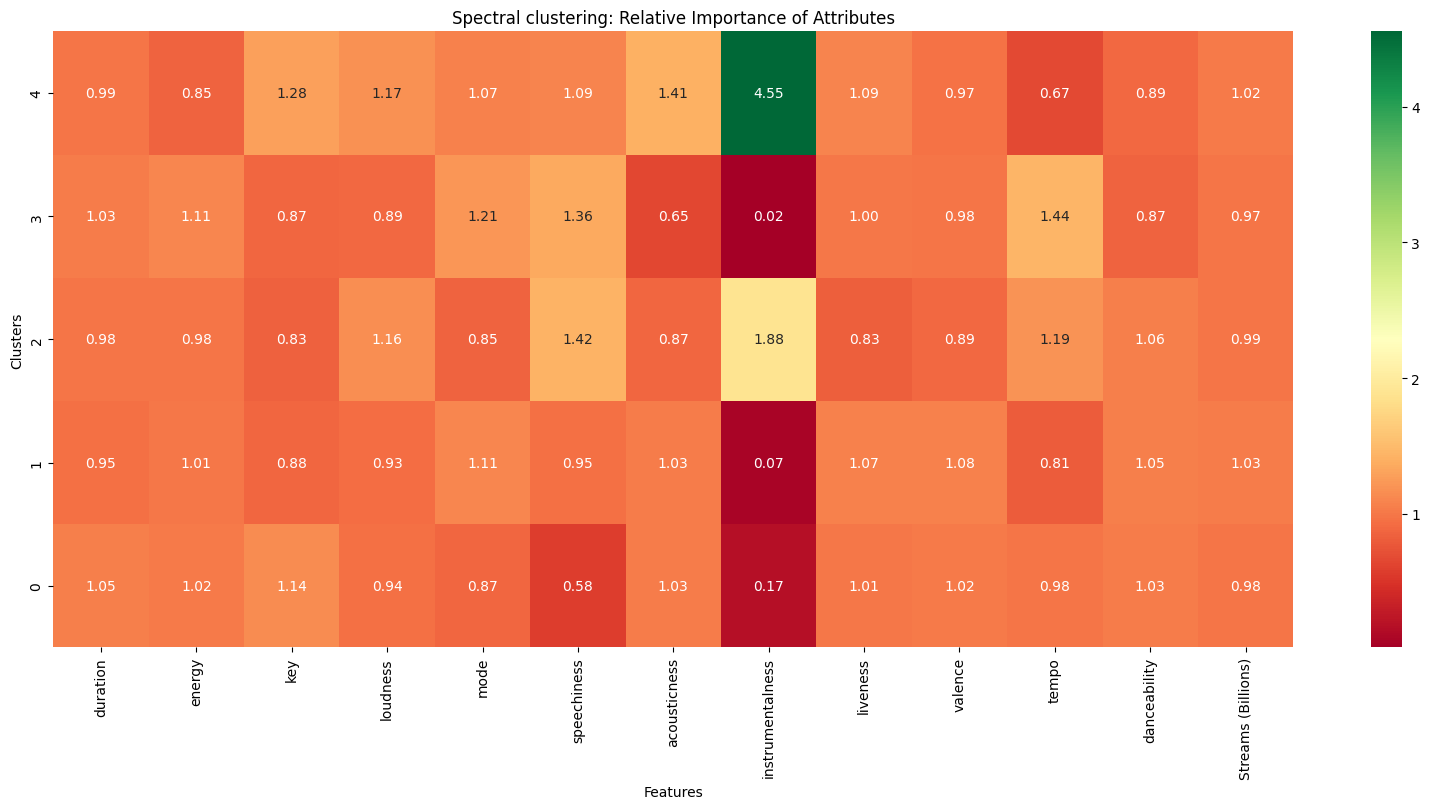

In [24]:
cluster_avg = df_final.groupby(['cluster']).mean()
population_avg = df_final.mean()
population_avg = population_avg.drop('cluster')
relative_imp = cluster_avg/population_avg
relative_imp.sort_values(by=['cluster'],inplace=True)
relative_imp.round(2).unstack()

plt.figure(figsize=(20, 8))
plt.title('Spectral clustering: Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,5)
plt.xlabel('Features')
plt.ylabel('Clusters')
# figure.tight_layout()
plt.show()